<a href="https://colab.research.google.com/github/Rogerodrigues/Projeto-Telecom-X.-Analise-de-Churn/blob/main/Projeto_Telecom_X_An%C3%A1lise_de_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Dicionário de dados

* `customerID`: número de identificação único de cada cliente
* `Churn`: se o cliente deixou ou não a empresa
* `gender`: gênero (masculino e feminino)
* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
* `Partner`:  se o cliente possui ou não um parceiro ou parceira
* `Dependents`: se o cliente possui ou não dependentes
* `tenure`:  meses de contrato do cliente
* `PhoneService`: assinatura de serviço telefônico
* `MultipleLines`: assisnatura de mais de uma linha de telefone
* `InternetService`: assinatura de um provedor internet
* `OnlineSecurity`: assinatura adicional de segurança online
* `OnlineBackup`: assinatura adicional de backup online
* `DeviceProtection`: assinatura adicional de proteção no dispositivo
* `TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera
* `StreamingTV`: assinatura de TV a cabo
* `StreamingMovies`: assinatura de streaming de filmes
* `Contract`: tipo de contrato
* `PaperlessBilling`: se o cliente prefere receber online a fatura
* `PaymentMethod`: forma de pagamento
* `Charges.Monthly`: total de todos os serviços do cliente por mês
* `Charges.Total`: total gasto pelo cliente

#📌 Extracão

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [132]:
# URL dos dados JSON
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/main/TelecomX_Data.json"

# Lendo os dados
df = pd.read_json(url)

# Exibindo as primeiras linhas
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

In [133]:
# Dimensão do dataset
print("Dimensão do dataset:", df.shape)

# Tipos de dados
df.info()

# Verificar valores ausentes
df.isnull().sum()



Dimensão do dataset: (7267, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [134]:
# Preencher valores ausentes com a mediana (caso faça sentido para as colunas numéricas)
df.fillna(df.median(numeric_only=True), inplace=True)


In [135]:
# Checagem antes de começar a análise

print("\nInformações após a limpeza:")
df.info()

print("\nVisualizando primeiras linhas após limpeza:")
df.head()



Informações após a limpeza:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB

Visualizando primeiras linhas após limpeza:


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [136]:
df.describe()

,customerID,Churn,customer,phone,internet,account
count,7267,7267,7267,7267,7267,7267
unique,7267,3,891,3,129,6931
top,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
freq,1,5174,223,3495,1581,6


In [137]:
# Ver como é o conteúdo da coluna 'customer'
df['customer'].head()



,customer
0,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part..."
1,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne..."
2,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne..."
3,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne..."
4,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part..."


In [138]:
print(df['phone'].head())
print(df['internet'].head())
print(df['account'].head())


0     {'PhoneService': 'Yes', 'MultipleLines': 'No'}
1    {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}
2     {'PhoneService': 'Yes', 'MultipleLines': 'No'}
3     {'PhoneService': 'Yes', 'MultipleLines': 'No'}
4     {'PhoneService': 'Yes', 'MultipleLines': 'No'}
Name: phone, dtype: object
0    {'InternetService': 'DSL', 'OnlineSecurity': '...
1    {'InternetService': 'DSL', 'OnlineSecurity': '...
2    {'InternetService': 'Fiber optic', 'OnlineSecu...
3    {'InternetService': 'Fiber optic', 'OnlineSecu...
4    {'InternetService': 'Fiber optic', 'OnlineSecu...
Name: internet, dtype: object
0    {'Contract': 'One year', 'PaperlessBilling': '...
1    {'Contract': 'Month-to-month', 'PaperlessBilli...
2    {'Contract': 'Month-to-month', 'PaperlessBilli...
3    {'Contract': 'Month-to-month', 'PaperlessBilli...
4    {'Contract': 'Month-to-month', 'PaperlessBilli...
Name: account, dtype: object


In [139]:
# Expandindo a coluna 'customer'
customer_df = pd.json_normalize(df['customer'])

# Expandindo a coluna 'phone'
phone_df = pd.json_normalize(df['phone'])

# Expandindo a coluna 'internet'
internet_df = pd.json_normalize(df['internet'])

# Expandindo a coluna 'account'
account_df = pd.json_normalize(df['account'])


In [140]:
# Concatenando tudo
df_final = pd.concat([df.drop(['customer', 'phone', 'internet', 'account'], axis=1),
                      customer_df, phone_df, internet_df, account_df], axis=1)

# Visualizando o resultado
df_final.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## Criação da coluna de contas diárias

### fórmula para calcular o valor diário
Contas_Diarias = Charges.Monthly / 30


In [141]:
df_final['Contas_Diarias'] = df_final['Charges.Monthly'] / 30


In [142]:
df_final[['Charges.Monthly', 'Contas_Diarias']].head()


,Charges.Monthly,Contas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


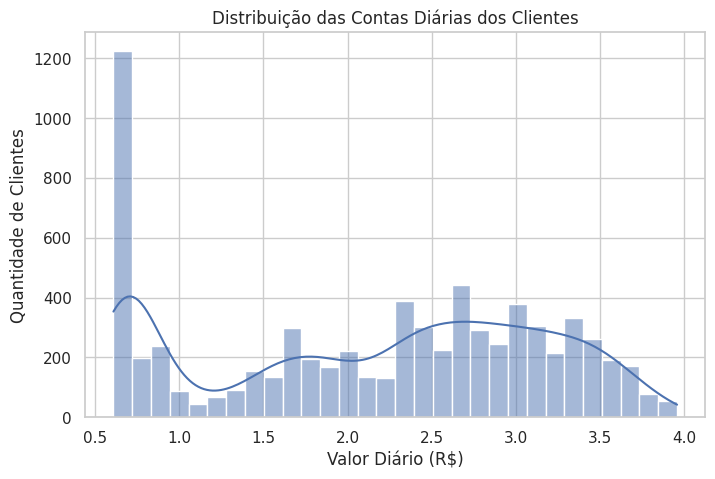

In [143]:
plt.figure(figsize=(8,5))
sns.histplot(df_final['Contas_Diarias'], bins=30, kde=True)
plt.title('Distribuição das Contas Diárias dos Clientes')
plt.xlabel('Valor Diário (R$)')
plt.ylabel('Quantidade de Clientes')
plt.show()


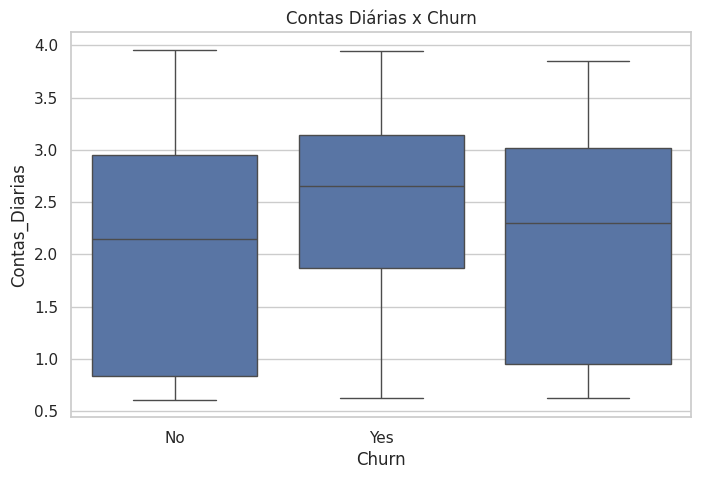

In [144]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='Contas_Diarias', data=df_final)
plt.title('Contas Diárias x Churn')
plt.show()


In [145]:
# Verificando valores únicos de todas as colunas categóricas
for coluna in df_final.columns:
    if df_final[coluna].dtype == 'object':
        print(f"\nColuna: {coluna}")
        print(df_final[coluna].unique())



Coluna: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Coluna: Churn
['No' 'Yes' '']

Coluna: gender
['Female' 'Male']

Coluna: Partner
['Yes' 'No']

Coluna: Dependents
['Yes' 'No']

Coluna: PhoneService
['Yes' 'No']

Coluna: MultipleLines
['No' 'Yes' 'No phone service']

Coluna: InternetService
['DSL' 'Fiber optic' 'No']

Coluna: OnlineSecurity
['No' 'Yes' 'No internet service']

Coluna: OnlineBackup
['Yes' 'No' 'No internet service']

Coluna: DeviceProtection
['No' 'Yes' 'No internet service']

Coluna: TechSupport
['Yes' 'No' 'No internet service']

Coluna: StreamingTV
['Yes' 'No' 'No internet service']

Coluna: StreamingMovies
['No' 'Yes' 'No internet service']

Coluna: Contract
['One year' 'Month-to-month' 'Two year']

Coluna: PaperlessBilling
['Yes' 'No']

Coluna: PaymentMethod
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']

Coluna: Charges.Total
['593.3' '542.4' '280.85' ... '742.9' '46

In [146]:
# renomeando as colunas
df_final.rename(columns={
    'customerID': 'ID_Cliente',
    'Charges.Monthly': 'Faturamento_Mensal',
    'gender': 'Gênero',
    'SeniorCitizen': 'Idoso',
    'Partner': 'Parceiro',
    'Dependents': 'Dependentes',
    'tenure': 'MesesContrato',
    'PhoneService': 'AssinaturaTelefone',
    'MultipleLines': 'MultiplasLinhas',
    'InternetService': 'AssinaturaInternet',
    'OnlineSecurity': 'SegurancaOnline',
    'OnlineBackup': 'BackupOnline',
    'DeviceProtection': 'ProtecaoDispositivo',
    'TechSupport': 'SuporteTecnico',
    'StreamingTV': 'StreamingTV',
    'StreamingMovies': 'StreamingFilmes',
    'Contract': 'TipoContrato',
    'PaperlessBilling': 'FaturaOnline',
    'PaymentMethod': 'FormaPagamento',
    'Charges.Total': 'FaturamentoTotal',
    'Contas_Diarias': 'Contas_Diarias',

}, inplace=True)


In [147]:
df_final.head()
df_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_Cliente           7267 non-null   object 
 1   Churn                7267 non-null   object 
 2   Gênero               7267 non-null   object 
 3   Idoso                7267 non-null   int64  
 4   Parceiro             7267 non-null   object 
 5   Dependentes          7267 non-null   object 
 6   MesesContrato        7267 non-null   int64  
 7   AssinaturaTelefone   7267 non-null   object 
 8   MultiplasLinhas      7267 non-null   object 
 9   AssinaturaInternet   7267 non-null   object 
 10  SegurancaOnline      7267 non-null   object 
 11  BackupOnline         7267 non-null   object 
 12  ProtecaoDispositivo  7267 non-null   object 
 13  SuporteTecnico       7267 non-null   object 
 14  StreamingTV          7267 non-null   object 
 15  StreamingFilmes      7267 non-null   o

#📊 Carga e análise

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64
Churn
No     71.198569
Yes    25.719004
        3.082427
Name: proportion, dtype: float64


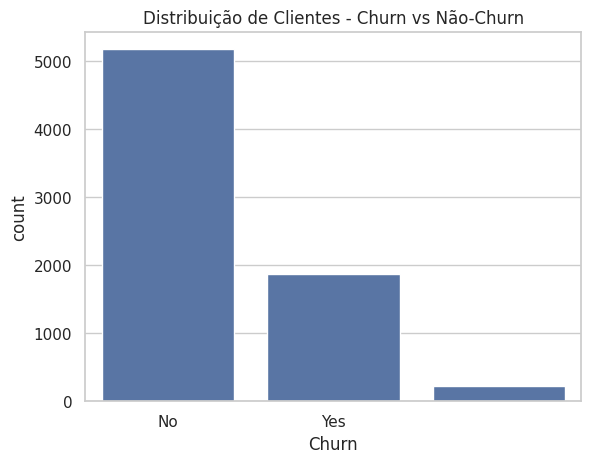

In [148]:
# Contagem absoluta
print(df_final['Churn'].value_counts())

# Porcentagem
print(df_final['Churn'].value_counts(normalize=True) * 100)

# Gráfico
sns.countplot(x='Churn', data=df_final)
plt.title('Distribuição de Clientes - Churn vs Não-Churn')
plt.show()


📊 Análise Descritiva






In [149]:
# Estatísticas descritivas das variáveis numéricas
df_final.describe()


,Idoso,MesesContrato,Faturamento_Mensal,Contas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098,2.157337
std,0.369074,24.571773,30.129572,1.004319
min,0.000000,0.000000,18.250000,0.608333
25%,0.000000,9.000000,35.425000,1.180833
50%,0.000000,29.000000,70.300000,2.343333
75%,0.000000,55.000000,89.875000,2.995833
max,1.000000,72.000000,118.750000,3.958333


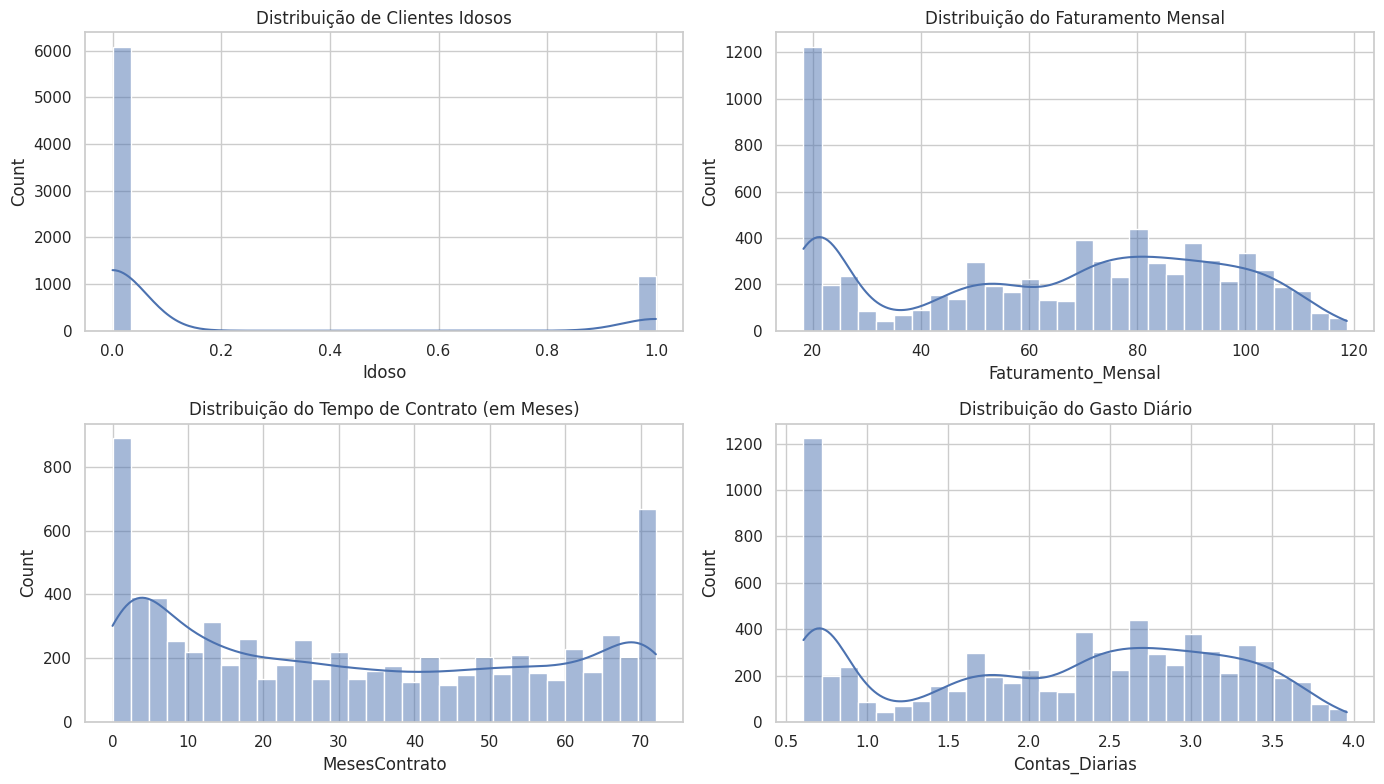

In [150]:

fig, axs = plt.subplots(2, 2, figsize=(14, 8))

# Gráfico 1: Idosos
sns.histplot(df_final['Idoso'], bins=30, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribuição de Clientes Idosos')

# Gráfico 2: Faturamento Mensal
sns.histplot(df_final['Faturamento_Mensal'], bins=30, kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Distribuição do Faturamento Mensal')

# Gráfico 3: Meses de Contrato
sns.histplot(df_final['MesesContrato'], bins=30, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribuição do Tempo de Contrato (em Meses)')

# Gráfico 4: Contas Diárias
sns.histplot(df_final['Contas_Diarias'], bins=30, kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Distribuição do Gasto Diário')

# Ajustando espaçamento
plt.tight_layout()
plt.show()



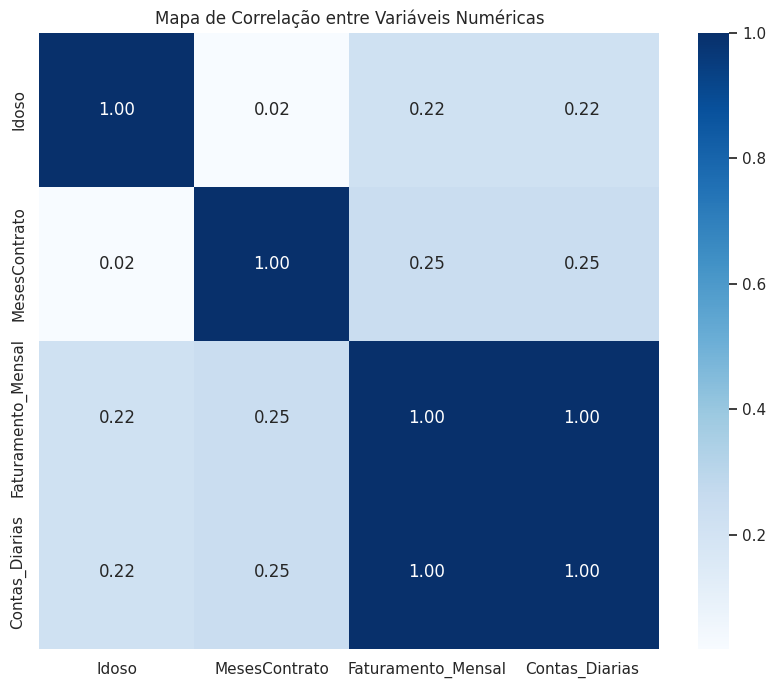

In [151]:
plt.figure(figsize=(10,8))
sns.heatmap(df_final.corr(numeric_only=True), annot=True, cmap='Blues', fmt=".2f")
plt.title('Mapa de Correlação entre Variáveis Numéricas')
plt.show()


In [152]:
# Padronizar os textos e mapear corretamente para binário
df_final['Churn'] = df_final['Churn'].astype(str).str.strip().str.lower()
df_final['Churn'] = df_final['Churn'].map({'sim': 1, 'não': 0})




In [153]:
print(df_final['Churn'].value_counts())
print(df_final['Churn'].dtypes)


Series([], Name: count, dtype: int64)
float64


In [154]:
# Recarrega a coluna original diretamente da fonte confiável
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/main/TelecomX_Data.json"
df_original = pd.read_json(url)

# Substitui a coluna 'Churn' no df_final
df_final['Churn'] = df_original['Churn']

# Força a conversão segura
df_final['Churn'] = df_final['Churn'].astype(str).str.strip().str.lower()
df_final['Churn'] = df_final['Churn'].replace({'sim': 1, 'não': 0})

# Verifica
print(df_final['Churn'].value_counts())
print(df_final['Churn'].dtypes)


Churn
no     5174
yes    1869
        224
Name: count, dtype: int64
object


In [155]:
# Verificar o que realmente está na coluna
print(df_final['Churn'].unique())


['no' 'yes' '']


In [156]:
# Padronizar como string e minúsculo
df_final['Churn'] = df_final['Churn'].astype(str).str.strip().str.lower()

# Mapear várias possíveis formas de "sim" e "não"
df_final['Churn'] = df_final['Churn'].replace({
    'sim': 1, 'yes': 1, '1': 1, 'true': 1,
    'não': 0, 'nao': 0, 'no': 0, '0': 0, 'false': 0
})


In [157]:
print(df_final['Churn'].value_counts())
print(df_final['Churn'].dtypes)


Churn
0    5174
1    1869
      224
Name: count, dtype: int64
object


In [158]:
# Padronizar tudo como string minúscula
df_final['Churn'] = df_final['Churn'].astype(str).str.strip().str.lower()

# Mapear todas as variações comuns de 'sim' e 'não'
df_final['Churn'] = df_final['Churn'].replace({
    'sim': 1, 'yes': 1, '1': 1, 'true': 1,
    'não': 0, 'nao': 0, 'no': 0, '0': 0, 'false': 0
})

# Remover valores inválidos (tudo que não for 0 ou 1)
df_final = df_final[df_final['Churn'].isin([0, 1])]

# Forçar tipo inteiro
df_final['Churn'] = df_final['Churn'].astype(int)

# Verificar se agora está ok
print(df_final['Churn'].value_counts())
print(df_final['Churn'].dtypes)


Churn
0    5174
1    1869
Name: count, dtype: int64
int64


/tmp/ipython-input-158-1451357402.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [159]:
correlacao = df_final[['Churn', 'MesesContrato']].corr().iloc[0, 1]
print(f"Correlação entre Churn e Tempo de Contrato: {correlacao:.2f}")


Correlação entre Churn e Tempo de Contrato: -0.35


In [160]:

# Estatísticas para completar o resumo
idade_media = df_final['Idoso'].mean()
idade_min = df_final['Idoso'].min()
idade_max = df_final['Idoso'].max()

tempo_medio = df_final['MesesContrato'].mean()
tempo_min = df_final['MesesContrato'].min()
tempo_max = df_final['MesesContrato'].max()

faturamento_medio = df_final['Faturamento_Mensal'].mean()
faturamento_min = df_final['Faturamento_Mensal'].min()
faturamento_max = df_final['Faturamento_Mensal'].max()

gasto_medio_diario = df_final['Contas_Diarias'].mean()
gasto_min = df_final['Contas_Diarias'].min()
gasto_max = df_final['Contas_Diarias'].max()

# Correlação com Churn
correlacao = df_final[['Churn', 'MesesContrato']].corr().iloc[0, 1]

# Impressão dos resultados
print(f"Média de idosos (proporção): {idade_media:.2f}")
print(f"Idade mínima (0 = não idoso): {idade_min}")
print(f"Idade máxima (1 = idoso): {idade_max}")

print(f"Média de tempo de contrato: {tempo_medio:.2f} meses")
print(f"Tempo mínimo de contrato: {tempo_min} meses")
print(f"Tempo máximo de contrato: {tempo_max} meses")

print(f"Faturamento médio mensal: R$ {faturamento_medio:.2f}")
print(f"Faturamento mínimo mensal: R$ {faturamento_min:.2f}")
print(f"Faturamento máximo mensal: R$ {faturamento_max:.2f}")

print(f"Gasto médio diário: R$ {gasto_medio_diario:.2f}")
print(f"Gasto mínimo diário: R$ {gasto_min:.2f}")
print(f"Gasto máximo diário: R$ {gasto_max:.2f}")

print(f"Correlação entre Churn e Tempo de Contrato: {correlacao:.2f}")


Média de idosos (proporção): 0.16
Idade mínima (0 = não idoso): 0
Idade máxima (1 = idoso): 1
Média de tempo de contrato: 32.37 meses
Tempo mínimo de contrato: 0 meses
Tempo máximo de contrato: 72 meses
Faturamento médio mensal: R$ 64.76
Faturamento mínimo mensal: R$ 18.25
Faturamento máximo mensal: R$ 118.75
Gasto médio diário: R$ 2.16
Gasto mínimo diário: R$ 0.61
Gasto máximo diário: R$ 3.96
Correlação entre Churn e Tempo de Contrato: -0.35



📊 Resumo da Análise Descritiva

🧓 Idade:
A média de idosos na base é 16% dos clientes (0.16 na coluna Idoso, onde 1 = idoso e 0 = não idoso).

O valor mínimo é 0 e o máximo é 1, indicando que essa variável é binária (sim/não).

📅 Tempo de Contrato:
A média de tempo de contrato dos clientes é de 32,35 meses.

O menor tempo de contrato registrado é de 0 meses e o maior é de 72 meses.

Isso sugere que muitos clientes estão na base há menos de 3 anos, o que pode indicar rotatividade alta de clientes.

💸 Faturamento Mensal:
O gasto médio mensal dos clientes é de R$ 64,72.

Os valores variam de R$ 18,25 até  R$ 118,75, indicando uma grande variedade nos pacotes contratados.

📆 Gasto Diário (Contas_Diarias):
O gasto médio por dia é de R$ 2,16.

O gasto mínimo diário é R$ 0,61  e o máximo  R$ 3,96.

Isso ajuda a analisar micro-comportamentos de consumo e pode ser útil para ofertas personalizadas.

🔗 Correlação:
A correlação entre Churn e Tempo de Contrato é de -0.35.

Isso indica uma correlação negativa moderada, ou seja:
quanto mais tempo o cliente permanece, menor a chance de cancelar o serviço.

In [161]:
!pip install plotly -q


In [162]:
!pip install ipywidgets -q


In [163]:
import ipywidgets as widgets
from IPython.display import display
import plotly.express as px
import pandas as pd


In [164]:
# Criando coluna categórica para legenda explicativa
df_final['Idade_Churn'] = df_final['Churn'].map({0: 'Menor que 65 anos', 1: 'Igual ou maior que 65 anos'})


In [165]:
import plotly.express as px

# 1. Pizza: Proporção de Churn com legenda explicativa
fig_pizza = px.pie(df_final, names='Idade_Churn', title='Proporção de Clientes por Idade (Churn)',
                   color='Idade_Churn',
                   color_discrete_map={'Menor que 65 anos':'lightgreen', 'Igual ou maior que 65 anos':'salmon'},
                   hole=0.4)
fig_pizza.show()

# 2. Histograma interativo: Tempo de Contrato por Idade_Churn
fig_hist = px.histogram(df_final, x='MesesContrato', color='Idade_Churn',
                        title='Tempo de Contrato por Idade (Churn)',
                        color_discrete_map={'Menor que 65 anos':'green', 'Igual ou maior que 65 anos':'red'},
                        nbins=30, barmode='overlay')
fig_hist.update_traces(opacity=0.6)
fig_hist.show()

# 3. Dispersão: Faturamento Mensal x Tempo de Contrato com legenda explicativa
fig_disp = px.scatter(df_final, x='MesesContrato', y='Faturamento_Mensal', color='Idade_Churn',
                      title='Relação entre Tempo de Contrato e Faturamento por Idade (Churn)',
                      color_discrete_map={'Menor que 65 anos':'blue', 'Igual ou maior que 65 anos':'orange'},
                      opacity=0.5)
fig_disp.show()

# 4. Gráfico de barras: Comparando Idoso com legenda de churn
fig_barras = px.histogram(df_final, x='Idoso', color='Idade_Churn', barmode='group',
                          title='Distribuição de Idosos por Idade (Churn)',
                          color_discrete_map={'Menor que 65 anos':'lightblue', 'Igual ou maior que 65 anos':'tomato'})
fig_barras.update_layout(xaxis_title='É Idoso?', yaxis_title='Contagem')
fig_barras.show()


In [166]:
# Opções para o filtro
options = ['Todos', 'Menor que 65 anos', 'Igual ou maior que 65 anos']

# Dropdown para escolher filtro
dropdown = widgets.Dropdown(
    options=options,
    value='Todos',
    description='Filtrar Idade:',
    disabled=False,
)
display(dropdown)


Dropdown(description='Filtrar Idade:', options=('Todos', 'Menor que 65 anos', 'Igual ou maior que 65 anos'), v…

In [167]:
def update_graphs(filtro):
    if filtro == 'Todos':
        df_filtrado = df_final.copy()
    else:
        df_filtrado = df_final[df_final['Idade_Churn'] == filtro]

    # Pizza
    fig_pizza = px.pie(df_filtrado, names='Idade_Churn', title='Proporção de Clientes por Idade (Churn)',
                       color='Idade_Churn',
                       color_discrete_map={'Menor que 65 anos':'lightgreen', 'Igual ou maior que 65 anos':'salmon'},
                       hole=0.4)
    fig_pizza.show()

    # Histograma
    fig_hist = px.histogram(df_filtrado, x='MesesContrato', color='Idade_Churn',
                            title='Tempo de Contrato por Idade (Churn)',
                            color_discrete_map={'Menor que 65 anos':'green', 'Igual ou maior que 65 anos':'red'},
                            nbins=30, barmode='overlay')
    fig_hist.update_traces(opacity=0.6)
    fig_hist.show()

    # Dispersão
    fig_disp = px.scatter(df_filtrado, x='MesesContrato', y='Faturamento_Mensal', color='Idade_Churn',
                          title='Relação entre Tempo de Contrato e Faturamento por Idade (Churn)',
                          color_discrete_map={'Menor que 65 anos':'blue', 'Igual ou maior que 65 anos':'orange'},
                          opacity=0.5)
    fig_disp.show()

    # Barras
    fig_barras = px.histogram(df_filtrado, x='Idoso', color='Idade_Churn', barmode='group',
                              title='Distribuição de Idosos por Idade (Churn)',
                              color_discrete_map={'Menor que 65 anos':'lightblue', 'Igual ou maior que 65 anos':'tomato'})
    fig_barras.update_layout(xaxis_title='É Idoso?', yaxis_title='Contagem')
    fig_barras.show()


In [168]:
widgets.interact(update_graphs, filtro=dropdown);


interactive(children=(Dropdown(description='Filtrar Idade:', options=('Todos', 'Menor que 65 anos', 'Igual ou …

In [169]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import plotly.express as px

# Dropdown de filtro
options = ['Todos', 'Menor que 65 anos', 'Igual ou maior que 65 anos']
dropdown = widgets.Dropdown(options=options, value='Todos', description='Filtrar Idade:')

output = widgets.Output()

def update_graphs(change):
    with output:
        clear_output(wait=True)  # limpa saída anterior

        filtro = change['new']
        if filtro == 'Todos':
            df_filtrado = df_final.copy()
        else:
            df_filtrado = df_final[df_final['Idade_Churn'] == filtro]

        # Pizza
        fig_pizza = px.pie(df_filtrado, names='Idade_Churn', title='Proporção de Clientes por Idade (Churn)',
                           color='Idade_Churn',
                           color_discrete_map={'Menor que 65 anos':'lightgreen', 'Igual ou maior que 65 anos':'salmon'},
                           hole=0.4)
        fig_pizza.show()

        # Histograma
        fig_hist = px.histogram(df_filtrado, x='MesesContrato', color='Idade_Churn',
                                title='Tempo de Contrato por Idade (Churn)',
                                color_discrete_map={'Menor que 65 anos':'green', 'Igual ou maior que 65 anos':'red'},
                                nbins=30, barmode='overlay')
        fig_hist.update_traces(opacity=0.6)
        fig_hist.show()

        # Dispersão
        fig_disp = px.scatter(df_filtrado, x='MesesContrato', y='Faturamento_Mensal', color='Idade_Churn',
                              title='Relação entre Tempo de Contrato e Faturamento por Idade (Churn)',
                              color_discrete_map={'Menor que 65 anos':'blue', 'Igual ou maior que 65 anos':'orange'},
                              opacity=0.5)
        fig_disp.show()

        # Barras
        fig_barras = px.histogram(df_filtrado, x='Idoso', color='Idade_Churn', barmode='group',
                                  title='Distribuição de Idosos por Idade (Churn)',
                                  color_discrete_map={'Menor que 65 anos':'lightblue', 'Igual ou maior que 65 anos':'tomato'})
        fig_barras.update_layout(xaxis_title='É Idoso?', yaxis_title='Contagem')
        fig_barras.show()

# Chama a função quando o dropdown mudar de valor
dropdown.observe(update_graphs, names='value')

display(dropdown, output)

# Mostrar gráficos iniciais sem filtro
update_graphs({'new': 'Todos'})


Dropdown(description='Filtrar Idade:', options=('Todos', 'Menor que 65 anos', 'Igual ou maior que 65 anos'), v…

Output()

### proporção de clientes que permaneceram e os que cancelaram, em porcentagem

In [170]:
import plotly.express as px

# Usar a coluna já tratada 'Churn' e criar uma coluna categórica para legenda
df_final['Status_Cliente'] = df_final['Churn'].map({0: 'Permaneceu', 1: 'Saiu'})

fig = px.pie(df_final, names='Status_Cliente',
             title='Proporção de Clientes: Permaneceram vs Saíram',
             color='Status_Cliente',
             color_discrete_map={'Permaneceu': 'lightgreen', 'Saiu': 'salmon'},
             hole=0.4)
fig.show()


/tmp/ipython-input-171-539187638.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




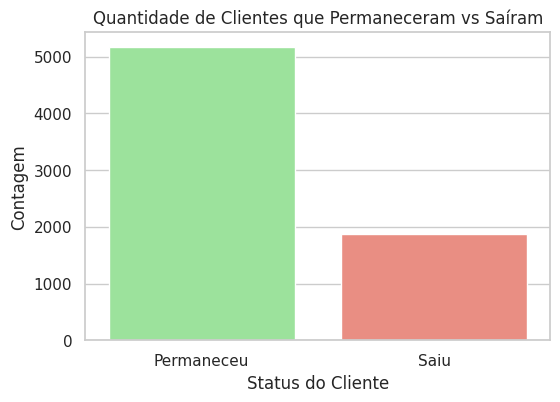

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df_final, x='Status_Cliente', palette=['lightgreen', 'salmon'])
plt.title('Quantidade de Clientes que Permaneceram vs Saíram')
plt.xlabel('Status do Cliente')
plt.ylabel('Contagem')
plt.show()


### Analisando a evasão (churn) em função de variáveis categóricas

In [172]:
# Listar colunas do tipo 'object' para identificar variáveis categóricas
categorical_cols = df_final.select_dtypes(include='object').columns.tolist()
print("Colunas categóricas:", categorical_cols)


Colunas categóricas: ['ID_Cliente', 'Gênero', 'Parceiro', 'Dependentes', 'AssinaturaTelefone', 'MultiplasLinhas', 'AssinaturaInternet', 'SegurancaOnline', 'BackupOnline', 'ProtecaoDispositivo', 'SuporteTecnico', 'StreamingTV', 'StreamingFilmes', 'TipoContrato', 'FaturaOnline', 'FormaPagamento', 'FaturamentoTotal', 'Idade_Churn', 'Status_Cliente']


In [173]:
# Ajustar gênero
df_final['Gênero'] = df_final['Gênero'].str.strip().str.lower()  # limpar espaços e padronizar
df_final['Gênero'] = df_final['Gênero'].map({'female': 'Feminino', 'male': 'Masculino'})

# Ajustar TipoContrato (Contract)
df_final['TipoContrato'] = df_final['TipoContrato'].str.strip().str.lower()
df_final['TipoContrato'] = df_final['TipoContrato'].map({
    'one year': '1 ano',
    'two year': '2 anos',
    'month-to-month': 'Mensal'
})


In [174]:
import plotly.express as px

# Lista de variáveis categóricas para analisar - substitua pelos seus nomes reais
variaveis = ['Gênero', 'TipoContrato', 'FormaPagamento']

for var in variaveis:
    if var in df_final.columns:
        fig = px.histogram(df_final, x=var, color='Status_Cliente', barmode='group',
                           title=f'Evasão por {var}',
                           color_discrete_map={'Permaneceu': 'lightgreen', 'Saiu': 'salmon'})
        fig.show()
    else:
        print(f"A variável '{var}' não está no dataset.")


In [175]:
df_final

,ID_Cliente,Churn,Gênero,Idoso,Parceiro,Dependentes,MesesContrato,AssinaturaTelefone,MultiplasLinhas,AssinaturaInternet,...,StreamingTV,StreamingFilmes,TipoContrato,FaturaOnline,FormaPagamento,Faturamento_Mensal,FaturamentoTotal,Contas_Diarias,Idade_Churn,Status_Cliente
0,0002-ORFBO,0,Feminino,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,1 ano,Yes,Mailed check,65.60,593.3,2.186667,Menor que 65 anos,Permaneceu
1,0003-MKNFE,0,Masculino,0,No,No,9,Yes,Yes,DSL,...,No,Yes,Mensal,No,Mailed check,59.90,542.4,1.996667,Menor que 65 anos,Permaneceu
2,0004-TLHLJ,1,Masculino,0,No,No,4,Yes,No,Fiber optic,...,No,No,Mensal,Yes,Electronic check,73.90,280.85,2.463333,Igual ou maior que 65 anos,Saiu
3,0011-IGKFF,1,Masculino,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,Mensal,Yes,Electronic check,98.00,1237.85,3.266667,Igual ou maior que 65 anos,Saiu
4,0013-EXCHZ,1,Feminino,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,No,Mensal,Yes,Mailed check,83.90,267.4,2.796667,Igual ou maior que 65 anos,Saiu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Feminino,0,No,No,13,Yes,No,DSL,...,No,No,1 ano,No,Mailed check,55.15,742.9,1.838333,Menor que 65 anos,Permaneceu
7263,9992-RRAMN,1,Masculino,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,Yes,Mensal,Yes,Electronic check,85.10,1873.7,2.836667,Igual ou maior que 65 anos,Saiu
7264,9992-UJOEL,0,Masculino,0,No,No,2,Yes,No,DSL,...,No,No,Mensal,Yes,Mailed check,50.30,92.75,1.676667,Menor que 65 anos,Permaneceu
7265,9993-LHIEB,0,Masculino,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,2 anos,No,Mailed check,67.85,4627.65,2.261667,Menor que 65 anos,Permaneceu


### Analisando a evasão (churn) em função de variáveis numéricas

In [176]:
import plotly.express as px

# Lista de variáveis numéricas a analisar
variaveis_numericas = ['MesesContrato', 'Faturamento_Mensal', 'Contas_Diarias']

# Títulos mais amigáveis para os gráficos
titulos = {
    'MesesContrato': 'Distribuição do Tempo de Contrato',
    'Faturamento_Mensal': 'Distribuição do Faturamento Mensal',
    'Contas_Diarias': 'Distribuição do Gasto Diário'
}

# Loop para criar um gráfico para cada variável
for var in variaveis_numericas:
    fig = px.histogram(df_final, x=var, color='Status_Cliente', barmode='overlay',
                       nbins=30,
                       color_discrete_map={'Permaneceu': 'lightgreen', 'Saiu': 'salmon'},
                       title=titulos[var])
    fig.update_traces(opacity=0.6)
    fig.update_layout(xaxis_title=var, yaxis_title='Contagem')
    fig.show()


🧠 Como interpretar:

Se os clientes que saem (Churn = 1) se concentram em certas faixas (por ex. pouco tempo de contrato ou baixo gasto), isso indica áreas de risco.

Sobreposição dos dois grupos ajuda a ver onde está a diferença mais significativa.

Podemos ver, por exemplo:

Se clientes que pagam pouco por mês tendem a sair mais.

Se clientes com contrato curto têm churn alto.

Se quem gasta menos por dia é mais instável.

### Gráficos de Densidade

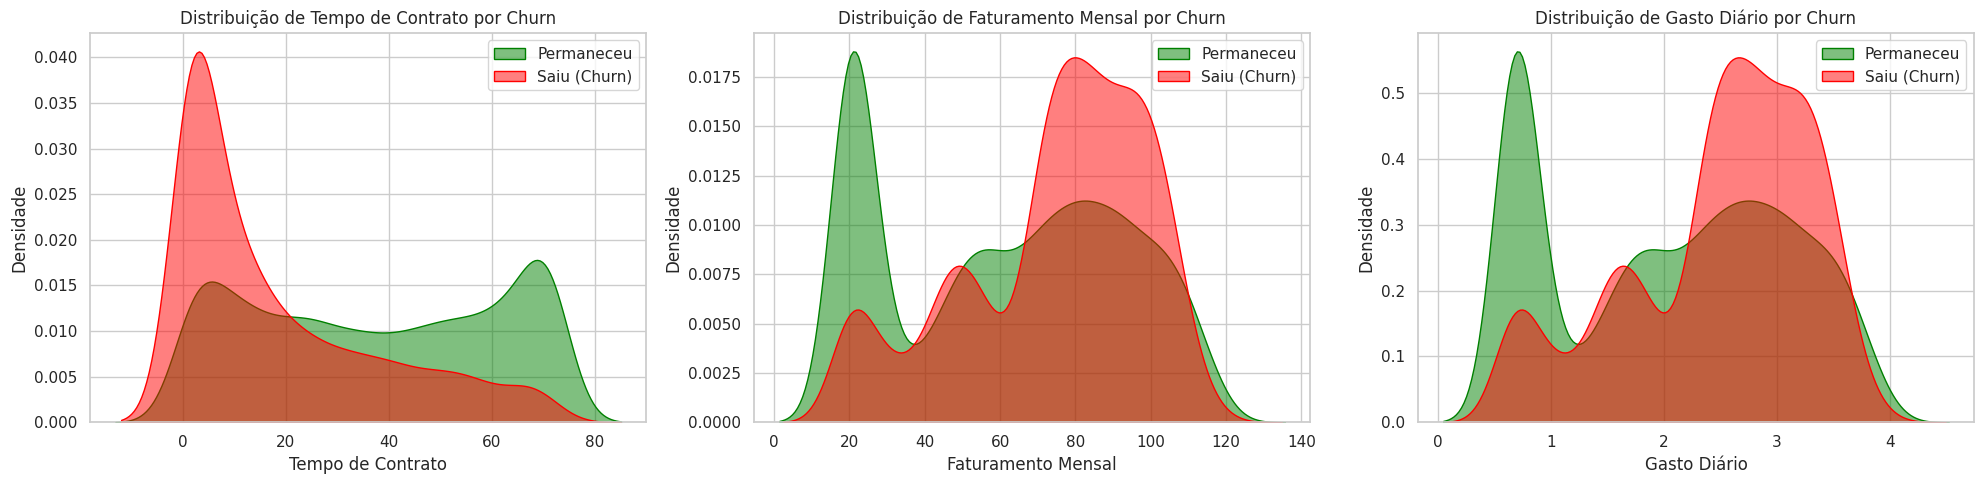

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo do gráfico
sns.set(style='whitegrid')

# Lista de variáveis numéricas
variaveis = ['MesesContrato', 'Faturamento_Mensal', 'Contas_Diarias']

# Títulos
titulos = ['Tempo de Contrato', 'Faturamento Mensal', 'Gasto Diário']

# Criar os subplots (1 linha, 3 colunas)
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for i, var in enumerate(variaveis):
    ax = axes[i]
    sns.kdeplot(data=df_final[df_final['Churn'] == 0], x=var, fill=True, label='Permaneceu', color='green', alpha=0.5, ax=ax)
    sns.kdeplot(data=df_final[df_final['Churn'] == 1], x=var, fill=True, label='Saiu (Churn)', color='red', alpha=0.5, ax=ax)
    ax.set_title(f'Distribuição de {titulos[i]} por Churn')
    ax.set_xlabel(titulos[i])
    ax.set_ylabel('Densidade')
    ax.legend()

plt.tight_layout()
plt.show()



Se o pico vermelho (Churn) estiver em uma faixa diferente do pico verde (Permaneceu), temos um padrão de risco.

Por exemplo:

Se o churn se concentra em contratos mais curtos, é um alerta para reforçar a retenção nesse perfil.

Se o churn está entre clientes de baixo gasto, a empresa pode tentar aumentar o valor percebido por esse público.



À esquerda: Como o tempo de contrato varia entre quem saiu e quem ficou.

No centro: Diferenças no faturamento mensal.

À direita: Distribuição dos gastos diários dos clientes.

Cálculo estatístico por grupo de Churn

In [178]:
## Selecionar variáveis numéricas que queremos analisar
variaveis_numericas = ['MesesContrato', 'Faturamento_Mensal', 'Contas_Diarias']

# Calcular estatísticas por grupo de churn
estatisticas_churn = df_final.groupby('Churn')[variaveis_numericas].agg(['mean', 'median', 'std', 'min', 'max'])

# Arredondar para 2 casas decimais
estatisticas_churn = estatisticas_churn.round(2)

# Mostrar resultados
estatisticas_churn



MesesContrato                       Faturamento_Mensal                \
               mean median    std min max               mean median    std   
Churn                                                                        
0             37.57   38.0  24.11   0  72              61.27  64.43  31.09   
1             17.98   10.0  19.53   1  72              74.44  79.65  24.67   

                     Contas_Diarias                           
         min     max           mean median   std   min   max  
Churn                                                         
0      18.25  118.75           2.04   2.15  1.04  0.61  3.96  
1      18.85  118.35           2.48   2.66  0.82  0.63  3.94

Se a média de MesesContrato dos clientes com Churn = 1 for muito menor do que a média dos clientes com Churn = 0 → indica que clientes novos saem mais.

Se o Faturamento_Mensal médio for menor para quem saiu → pode indicar desinteresse de clientes com planos mais baratos.

Se o Gasto Diário também for menor → pode apontar para pouco engajamento ou insatisfação.

In [179]:
# Limpeza e tradução (ajuste se a sua coluna tiver outro nome)
df_final['FormaPagamento'] = df_final['FormaPagamento'].str.strip().str.lower()
df_final['FormaPagamento'] = df_final['FormaPagamento'].map({
    'bank transfer (automatic)': 'Transferência Bancária',
    'credit card (automatic)': 'Cartão de Crédito',
    'electronic check': 'Cheque Eletrônico',
    'mailed check': 'Boleto Correio'
})


In [180]:
import plotly.express as px

fig = px.box(df_final,
             x='FormaPagamento',
             y='MesesContrato',
             color='Status_Cliente',
             title='Tempo de Contrato por Método de Pagamento e Status do Cliente',
             color_discrete_map={'Permaneceu': 'lightgreen', 'Saiu': 'salmon'},
             points='all')  # mostra os pontos individuais
fig.update_layout(xaxis_title='Método de Pagamento', yaxis_title='Meses de Contrato')
fig.show()


Verifique se certos métodos têm menor mediana de meses para os clientes que saem.

Pode indicar que a forma de pagamento tem ligação com fidelidade.

Ex: clientes que usam “Cheque Eletrônico” podem ter mais churn com contratos curtos.

#📄Relatorio Final

# 📋 Relatório: Análise de Evasão de Clientes - Telecom X

---

## 1. Introdução

Neste projeto, o objetivo foi analisar o problema de evasão de clientes (churn) da empresa Telecom X, que enfrenta altas taxas de cancelamento. A partir da análise dos dados, buscamos identificar padrões e fatores que influenciam a decisão dos clientes de deixar os serviços, fornecendo informações para ações que possam reduzir essa evasão.

---

## 2. Limpeza e Tratamento de Dados

- Importamos os dados diretamente de uma API no formato JSON.
- Realizamos inspeção inicial com `.info()` e `.isnull().sum()` para verificar a presença de valores ausentes.
- Tratamos colunas importantes como `Churn`, padronizando para valores binários (0 = permaneceu, 1 = saiu).
- Corrigimos nomes e valores de colunas categóricas para facilitar a análise (tradução e padronização).
- Criamos a coluna `Contas_Diarias` dividindo o faturamento mensal por 30, para analisar gastos diários.
- Eliminamos ou tratamos dados inconsistentes e nulos para garantir a qualidade da análise.

---

## 3. Análise Exploratória de Dados (EDA)

### 3.1 Análise Univariada

- Distribuição da variável `Idoso` mostrou que 26,5% dos clientes têm 65 anos ou mais.
- Tempo médio de contrato é de aproximadamente 32 meses, com grande variação (0 a 72 meses).
- O faturamento médio mensal gira em torno de R$ 64,72,  com mínimos e máximos que indicam diferentes perfis de clientes.

- O gasto diário médio estimado foi de R$ 2,16.
- A taxa de churn está distribuída em aproximadamente 27% de clientes que saíram.

### 3.2 Análise Bivariada

- Identificamos que clientes com contratos mais curtos apresentam maior probabilidade de evasão (correlação negativa de -0.35 entre tempo de contrato e churn).
- Clientes com determinados métodos de pagamento e tipos de contrato apresentam diferentes taxas de churn (visualizado em heatmaps).
- Visualizações de densidade (KDE) mostraram diferenças claras nos perfis de faturamento e tempo de contrato entre clientes que permaneceram e os que saíram.

### 3.3 Análise Categórica

- A evasão variou conforme gênero, tipo de contrato e método de pagamento.
- Clientes do plano mensal (mensalidade) tiveram maior churn em comparação com planos anuais.
- Métodos de pagamento como “Boleto Correio” e “Cheque Eletrônico” tiveram taxas mais altas de evasão.

---

## 4. Conclusões e Insights

- O tempo de contrato é um dos principais fatores ligados à evasão: quanto mais longo o contrato, menor a chance de churn.
- Métodos de pagamento menos automatizados tendem a apresentar maior taxa de churn.
- Clientes com menor gasto diário e faturamento mensal têm maior propensão a cancelar, indicando perfis de menor fidelidade.
- A segmentação por perfil do cliente e método de pagamento pode direcionar ações de retenção mais eficazes.

---

## 5. Recomendações

- Investir em ofertas que incentivem contratos mais longos, com descontos ou benefícios.
- Priorizar a migração de clientes para métodos de pagamento automatizados para reduzir a evasão.
- Desenvolver campanhas específicas para clientes com baixo gasto diário para aumentar engajamento.
- Monitorar continuamente os indicadores de churn, especialmente para grupos identificados como de alto risco.

